<h2 style="color:blue" align="left"> Task 1: Prediction using Supervised ML </h2>


### Simple Linear Regression 

## Objective

- Predict the percentage of an student based on the no. of study hours.


- **What will be predicted score if a student studies for 9.25 hrs/ day?**


- In this task we will predict the percentage of marks that a student would score based on the ammount of time they spend studying.

### Author
Anuganti Suresh 

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [2]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

In [3]:
# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LinearRegression                        # Linear Regression, Lasso and Ridge
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [4]:
# Loading the dataset
df = pd.read_csv("https://bit.ly/w-data")

In [5]:
# Import first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Import last 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):", df.shape)

data shape (Rows, Columns): (25, 2)


In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# check dataframe structure like columns and its counts, datatypes & Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.dtypes.value_counts()

int64      1
float64    1
dtype: int64

In [10]:
# Gives number of data points in each variable
df.count()

Hours     25
Scores    25
dtype: int64

In [12]:
# descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

### a) Missing Values

In [13]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

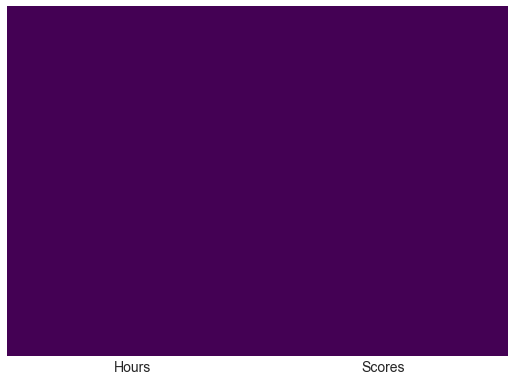

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### b) Correlation Matrix

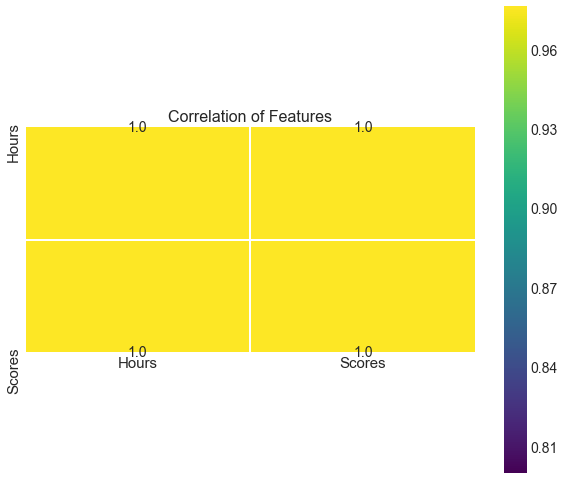

In [37]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot=True, vmax=0.8, cmap='viridis', fmt='.1f', linewidth=1, square=True)
plt.title('Correlation of Features', y=1, size=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### c) Find Outliers

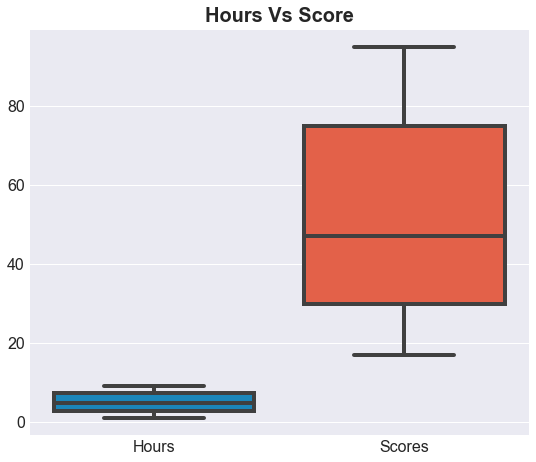

In [18]:
plt.figure(figsize=(8,7))
sns.boxplot(data=df)

plt.title("Hours Vs Score", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

- we can observe from Box plot that there is **no outliers** in dataset.

### d) Skew and Kurtosis

In [19]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

Text(0.5, 1.0, 'Skew:0.1903382010052985')

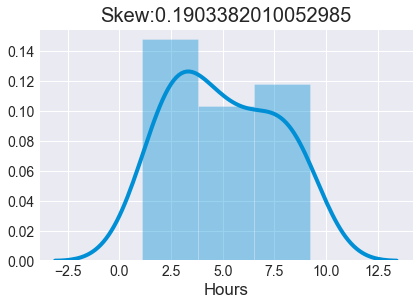

In [44]:
sns.distplot(df['Hours'])
Skew_Hours = df['Hours'].skew()
plt.title("Skew:"+str(Skew_Hours))

Text(0.5, 1.0, 'Skew:0.2339646665397317')

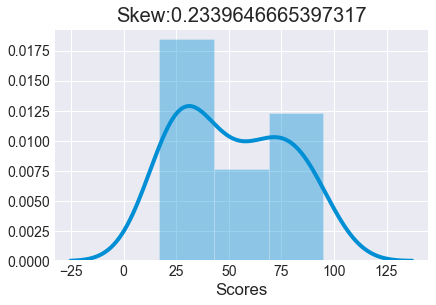

In [45]:
sns.distplot(df['Scores'])
Skew_Scores = df['Scores'].skew()
plt.title("Skew:"+str(Skew_Scores))

In [21]:
df.kurt()

Hours    -1.302343
Scores   -1.443833
dtype: float64

<h2 style="color:blue" align="left"> 4. Data Preprocessing </h2>

### i) Hours

In [22]:
df['Hours'].nunique()

23

In [23]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

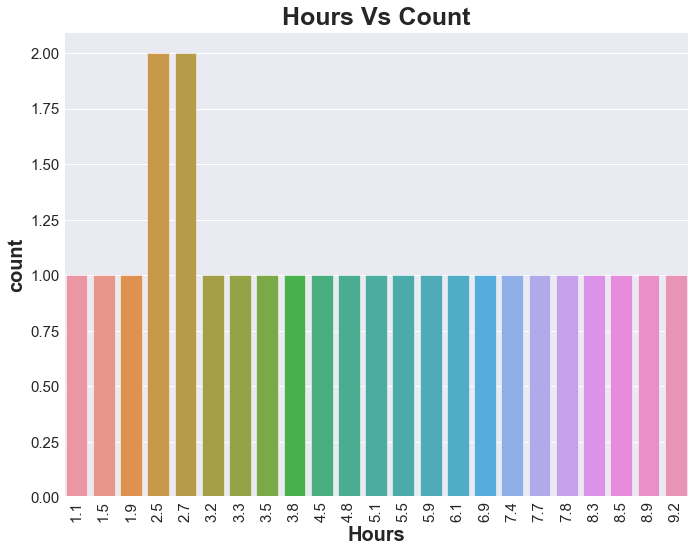

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64


In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df['Hours'])

plt.xlabel('Hours', fontsize=20, fontweight='bold')
plt.ylabel('count', fontsize=20, fontweight='bold')

plt.title('Hours Vs Count', fontsize=25, fontweight='bold')

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print(df['Hours'].value_counts())

### ii) Scores

In [28]:
df['Scores'].nunique()

23

In [29]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

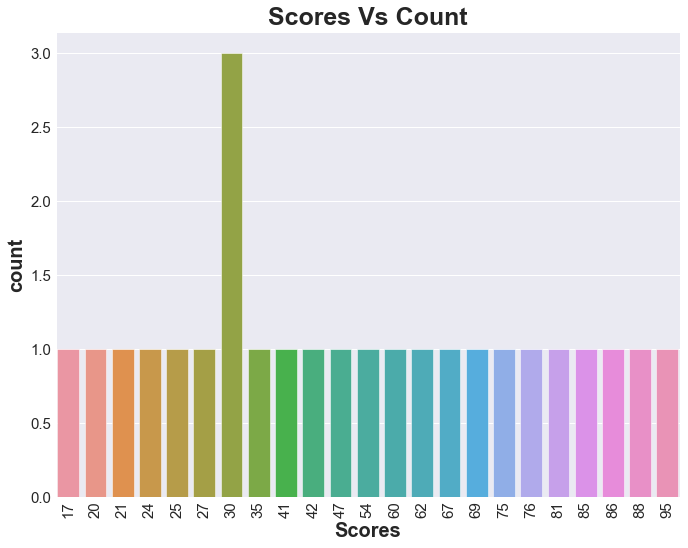

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64


In [30]:
plt.figure(figsize=(10,8))
sns.countplot(df['Scores'])

plt.xlabel('Scores', fontsize=20, fontweight='bold')
plt.ylabel('count', fontsize=20, fontweight='bold')

plt.title('Scores Vs Count', fontsize=25, fontweight='bold')

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print(df['Scores'].value_counts())

<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Univariate Analysis

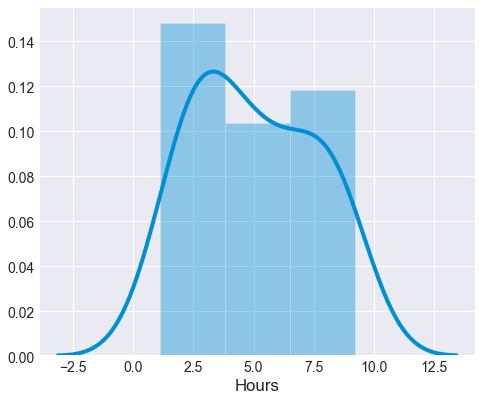

In [39]:
# Histogram for "Hours"
plt.figure(figsize=(7,6))
sns.distplot(df['Hours'])

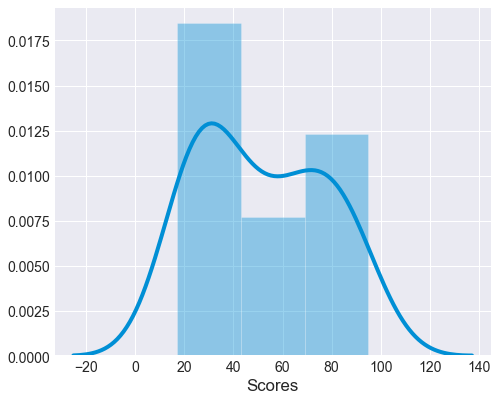

In [40]:
# Histogram for "Scores"
plt.figure(figsize=(7,6))
sns.distplot(df['Scores'])

### 2. Bivariate Analysis

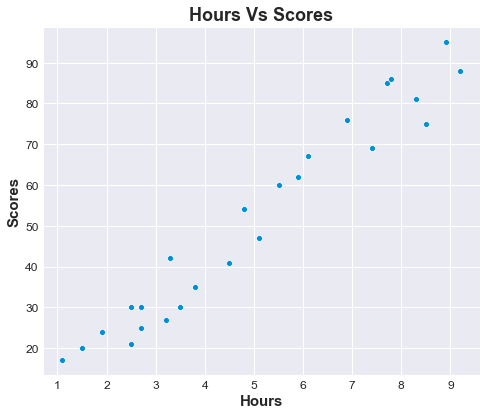

In [41]:
# Scatter Plot between "Hours" and "Scores"
plt.figure(figsize=(7,6))
sns.scatterplot(df.Hours, df.Scores)

plt.xlabel('Hours', fontsize=15, fontweight='bold')
plt.ylabel('Scores', fontsize=15, fontweight='bold')

plt.title('Hours Vs Scores', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- From graph we can see that there is a positive relationship between features.

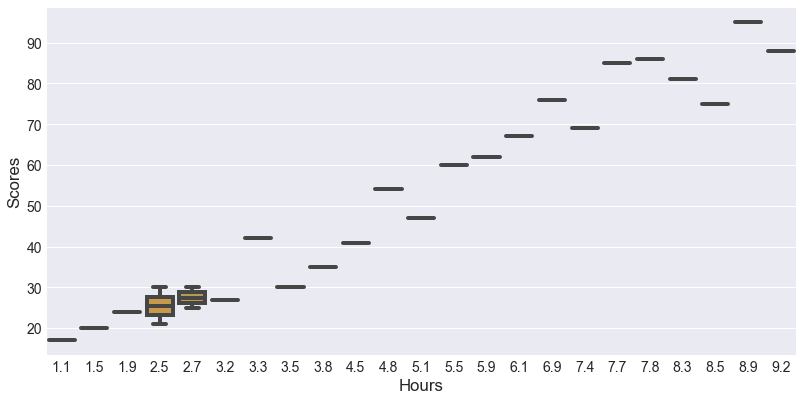

In [42]:
# Box Plot for "Hours" and "Scores"
plt.figure(figsize = (12, 6))
sns.boxplot(x='Hours', y='Scores', data = df)

<h2 style="color:blue" align="left"> 6. Model building and Evaluation </h2>

In [47]:
# Independant variable
X = df.iloc[:, :-1].values       # All rows & columns exclude Target features

# Dependant variable
y = df.iloc[:, 1].values        # Only target feature

In [48]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [49]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


### 1. Linear Regression

In [78]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predicting the scores
y_pred_LinReg = LinReg.predict(X_test)

In [80]:
print("Linear Regression : Train Score {:.2f} & Test Score {:.2f}".format(LinReg.score(X_train, y_train), LinReg.score(X_test, y_test)))

Linear Regression : Train Score 0.96 & Test Score 0.83


In [52]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LinReg})  
df 

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


In [55]:
c = LinReg.intercept_
m = LinReg.coef_
line = m*X+c

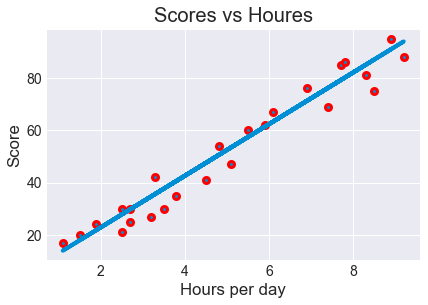

In [63]:
plt.scatter(X,y, linewidth=3, edgecolors='red')
plt.plot(X, line)
plt.xlabel('Hours per day')
plt.ylabel('Score')
plt.title('Scores vs Houres')
plt.show()

In [68]:
# You can also test with your own data
hours = [9.25]
pred = LinReg.predict([hours])
print("No of Hours = {}".format([hours]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.43733048038095


In [76]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_LinReg)),
            mean_squared_error(y_test, y_pred_LinReg),
            mean_absolute_error(y_test, y_pred_LinReg),
            r2_score(y_test, y_pred_LinReg)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 7.44 		 55.34 		6.89 		0.83
